# DATA 4319: Statistical & Machine Learning

## Learning from Data: Problem 1.4

In this notebook we solve Problem 1.4 from the textbook "Learning from Data". 

(a) Generate a linearly seperable data set of size 20 as indicated in Excercise 1.4. Plot the examples $\{(\mathbf{x}_n, y_n)\}$ as well as target function $f$ on a plan. Be sure to mark the examples from different classes differently, and add labels to the axes of the plot. 

In [1]:
# Import Plots package for visualization 
using Plots

In [2]:
function make_random_linearSeparable_data(n, ϵ)
    w = rand(2)
    w[2] = w[2]/5
    Data = rand(n,2)
    Data = [(Data[i,1], Data[i,2]) for i = 1:n 
            if abs(Data[i,2] - w[1]*Data[i,1] - w[2]) > ϵ]
    Y = [Data[i][2] > w[1]*Data[i][1] + w[2] ? 1 : -1 for i = 1:size(Data)[1]]   
    return Data, Y, w
end

make_random_linearSeparable_data (generic function with 1 method)

In [3]:
D, Y, coeff = make_random_linearSeparable_data(50, 0.02);

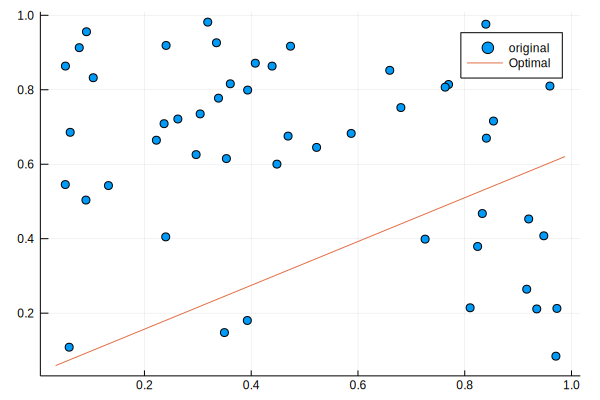

In [7]:
scatter(D, label = "original")
plot!(x -> coeff[1]*x + coeff[2], label = "Optimal")

In [4]:
function perceptron(data, labels, w)
        
    # Define hypothesis function 
    h(x) = w'*[1.0, x[1], x[2]] < 0 ? -1 : 1
    
    for i = 1:size(data)[1]
        if h(data[i]) != labels[i]
            w += labels[i]*[1.0, data[i][1], data[i][2]]
        end
    end
    return w
end  

perceptron (generic function with 1 method)

In [5]:
w = perceptron(D, Y, rand(3));

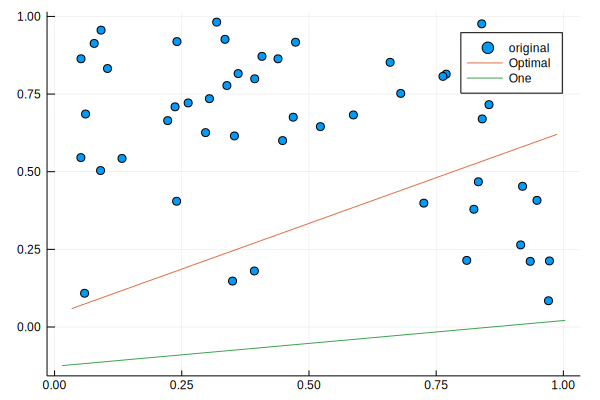

In [8]:
plot!(x -> (-w[1]-w[2]*x)/w[3], label = "One")

In [9]:
w = perceptron(D, Y, w);

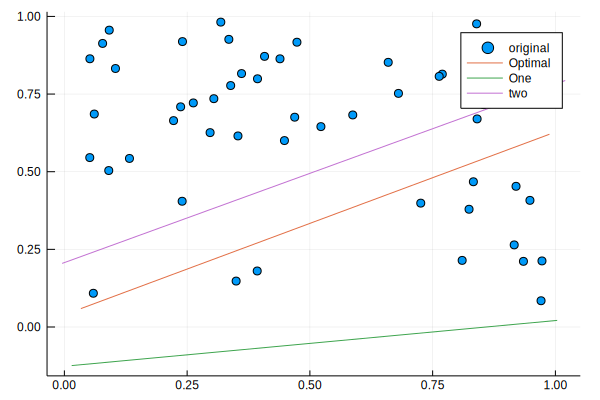

In [10]:
plot!(x -> (-w[1]-w[2]*x)/w[3],label="two")

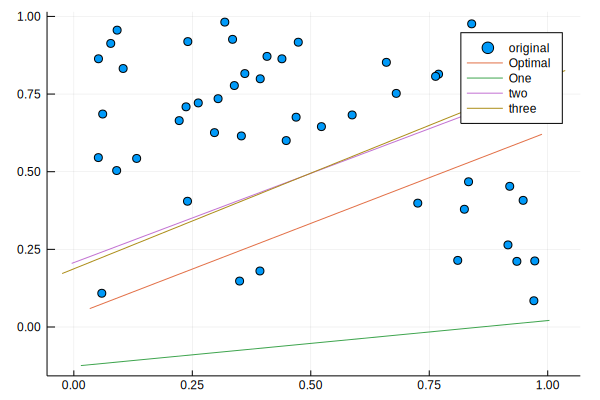

In [11]:
w = perceptron(D, Y, w)
plot!(x -> (-w[1]-w[2]*x)/w[3], label="three")

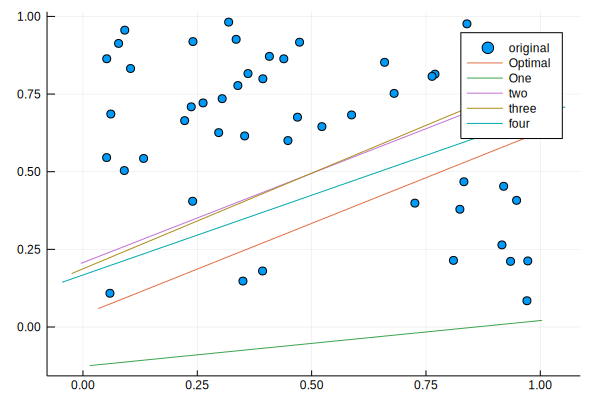

In [12]:
w = perceptron(D, Y, w)
plot!(x -> (-w[1]-w[2]*x)/w[3], label="four")

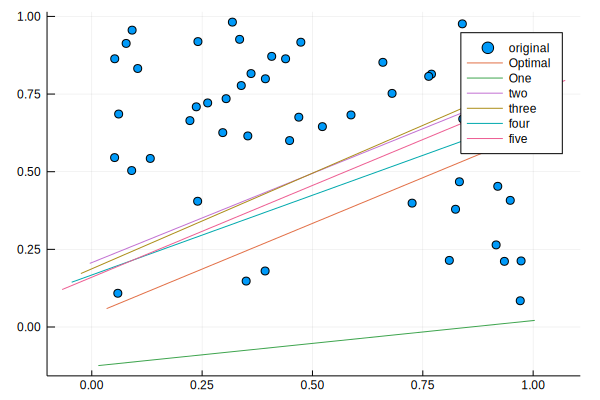

In [13]:
w = perceptron(D, Y, w)
plot!(x -> (-w[1]-w[2]*x)/w[3], label="five")

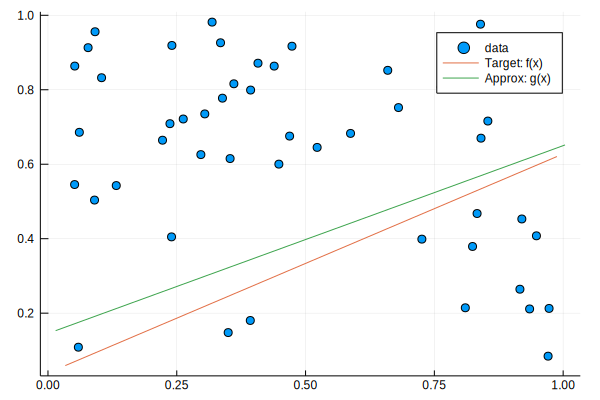

In [14]:
w = perceptron(D, Y, w)
scatter(D, label = "data")
plot!(x -> coeff[1]*x + coeff[2], label = "Target: f(x)")
plot!(x -> (-w[1]-w[2]*x)/w[3], label="Approx: g(x)")